# Согласование частей речи

### Первый семестр. Согласование по роду.

Идея: по контексту слова предскажем род слова. Там, где предсказанное отличается от действительного - ошибка.

Род слова берем из Pymorphy. Это и будет таргетом.
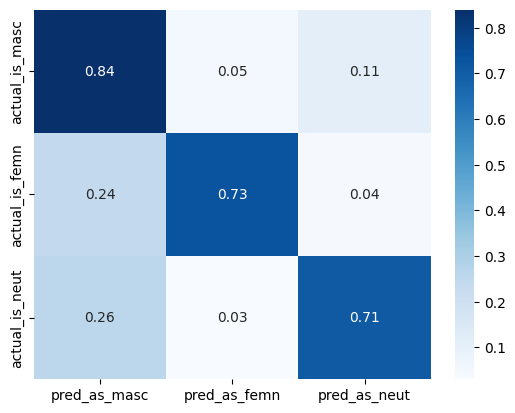

### Второй семестр. Решение через окончания.

Хотим найти рассогласование. Идея: С помощью нейросети предскажем окончание слова. Там, где предсказанное не совпадает с действительным - ошибка.

Для простоты решили начать с поиска рассогласования прилагательных.

Существует 3 склонения прилагательных:
* Новый
* Хороший
* Большой

Опять же, для простоты начнем с чего-то одного - одного типа склонения, например "Новый".

##### Подготовка бандла

Объектами в нашем датасете будут прилагательные, таргетом - окончания.
Мы подготовим бандл, в котором будут прилагательные трех склонений. Потом отфильтруем.

За создание бандла отвечает `AdjAgreementTrainIndexBuilder`

И вот как он работает:
Фильтруем прилагательные по pymorphy.

Есть список всех возможных окончаний прилагательных, за исключением, может быть, особо редких, таких как "ОЮ" в слове "новою".

С помощью этого списка изхвлекаем окончние.

Извлекаем окончание нормальной формы слова, их может быть всего 3: ['ый', 'ий', 'ой']. По окончанию определяем склонение.

Записываем в таргет label-encoded окончание слова, в признак - склонение.
По дороге пишем в файл те прилагательные, для которых не удалось извлечь окончания. Там слова "какая-нибудь", "ваша", "одна". Посмотрев глазами, понимаем, что, действительно, это либо не прилагательные, либо особые случаи, которые надо обрабатывать как-то отдельно.


Собрали универсальный бандл. Отфлитровали по склонению.
БОльшую часть экспериментов проводили на бандле, в котором 88_000 слов в индексе и 2_500_000 в src. Отметим, что бандл большой, притом индекс маленький.

##### Сеть

Использовали lstm, после нее полносвязный слой на 50 нейронов.

CtorAdapter('torch.optim:Adam', ('params',), lr=0.1)

CtorAdapter("torch.nn:CrossEntropyLoss")

Стратификация по таргету.

##### Новый

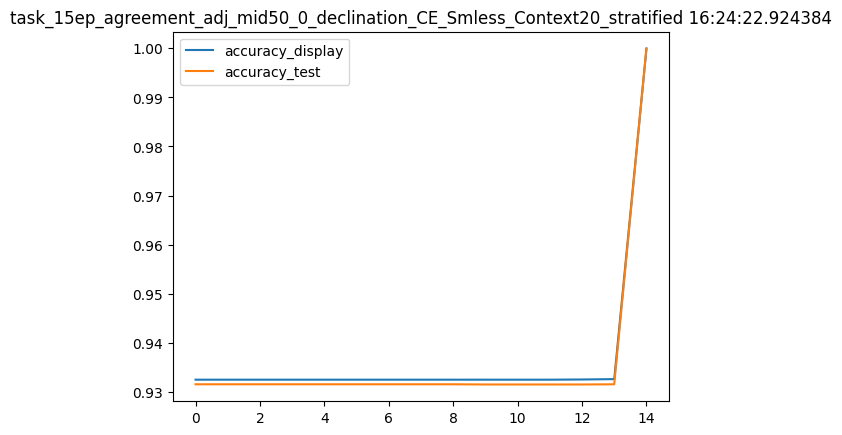

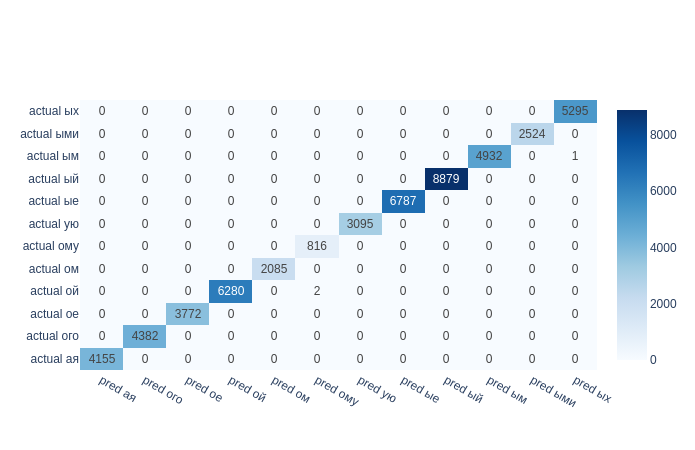

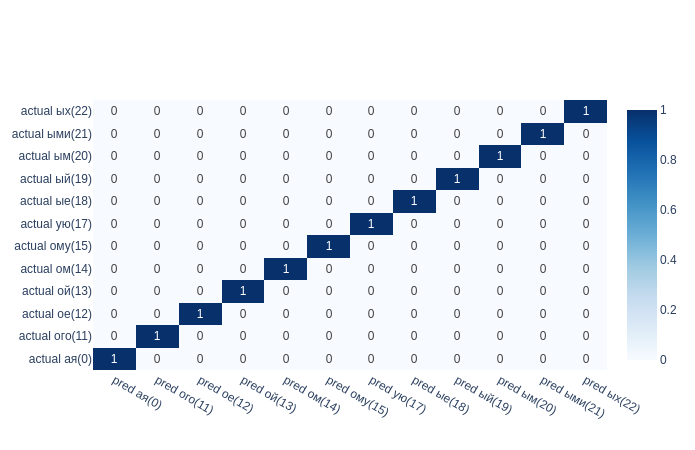

##### Хороший

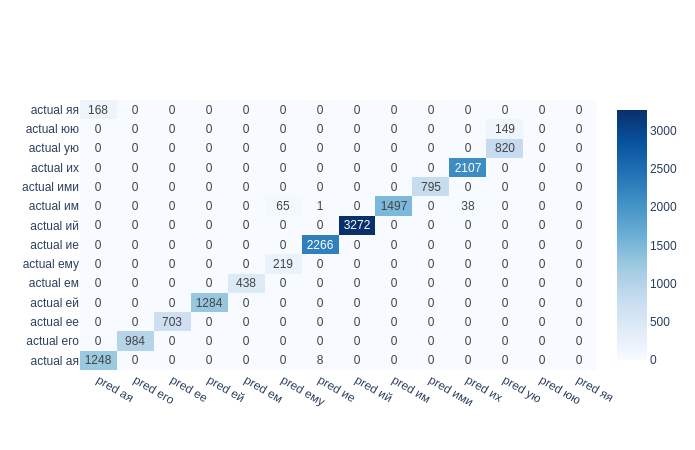

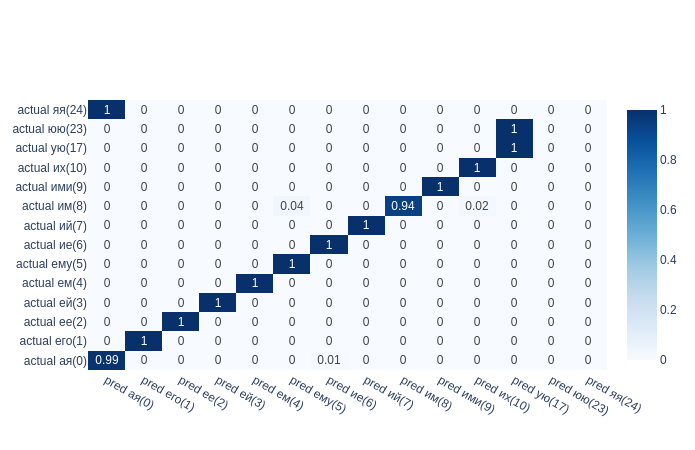

Вывод: редкие классы "юю" "яя" не предсказываются. e.g. "Последяя/последнюю" 

##### Большой

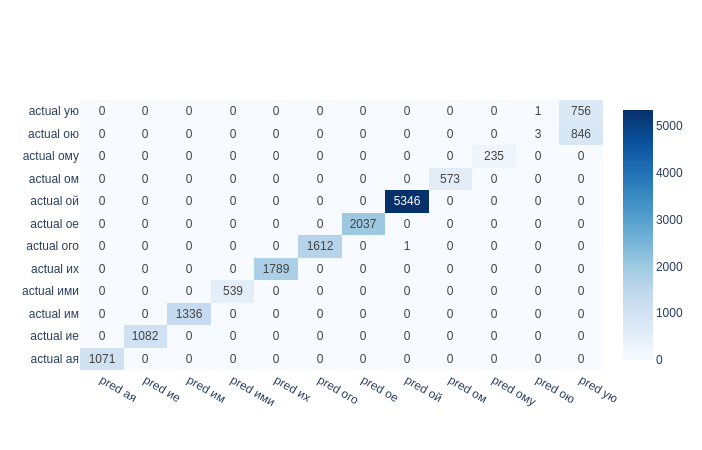

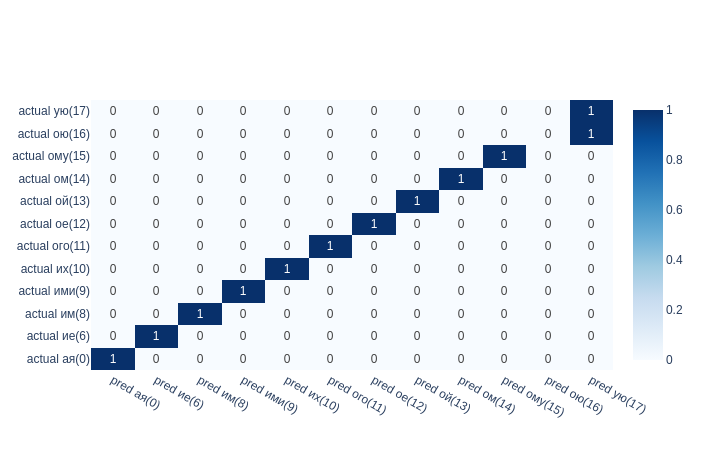

Вывод: редкий класс "ою" не предсказывается. e.g. "Большою" 